In [267]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ["figure.figsize"] = 10,6
import seaborn as sns
from scipy import stats
import math
import datetime
import urllib
import zipfile
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import glob
ohe = OneHotEncoder
le = LabelEncoder()

import scipy.stats
import pylab



In [268]:
bike_station = pd.read_csv('stations.csv')

In [269]:

#- instant: record index
#- dteday : date
#- season : season (1:winter, 2:spring, 3:summer, 4:fall)
#- yr : year (0: 2011, 1:2012)
#- mnth : month ( 1 to 12)
#- hr : hour (0 to 23)
#- holiday : weather day is holiday or not (extracted from [Web Link])
#- weekday : day of the week
#- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#+ weathersit :
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
#- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
#- hum: Normalized humidity. The values are divided to 100 (max)
#- windspeed: Normalized wind speed. The values are divided to 67 (max)
#- casual: count of casual users
#- registered: count of registered users
#- cnt: count of total rental bikes including both casual and registered 

#Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv 

In [270]:
dates = ["2011-01-01"]

pd.to_datetime(dates)

DatetimeIndex(['2011-01-01'], dtype='datetime64[ns]', freq=None)

In [271]:
bike_hour = pd.read_csv('hour.csv')

bike_hour.shape

#bike_hour.tail(50)

bike_hour["temp"]



0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [273]:
# Python program to print current date
 
from datetime import date
 
# calling the today
# function of date class
today = date.today()
 
print("Today's date is", today)

Today's date is 2022-11-12


In [274]:
 # date object of today's date
today = date.today()
 
print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2022
Current month: 11
Current day: 12


In [275]:
from datetime import datetime
 
# Getting Datetime from timestamp
date_time = datetime.fromtimestamp(1887639468)
print("Datetime from timestamp:", date_time)

Datetime from timestamp: 2029-10-25 18:17:48


In [276]:
# import datetime module from datetime
from datetime import datetime
  
# consider the time stamps from a list  in string
# format DD/MM/YY H:M:S.micros
time_data = ["25/05/99 02:35:8.023", "26/05/99 12:45:0.003",
             "27/05/99 07:35:5.523", "28/05/99 05:15:55.523"]
  
# format the string in the given format : day/month/year 
# hours/minutes/seconds-micro seconds
format_data = "%d/%m/%y %H:%M:%S.%f"
  
# Using strptime with datetime we will format string
# into datetime
for i in time_data:
    print(datetime.strptime(i, format_data))

1999-05-25 02:35:08.023000
1999-05-26 12:45:00.003000
1999-05-27 07:35:05.523000
1999-05-28 05:15:55.523000


In [277]:
bike_station.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [278]:
bike_station[bike_station.isnull().any(axis=1)]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type


In [279]:
bike_hour.loc[bike_hour['holiday'] == 0, 'holiday'] = 'No'
bike_hour.loc[bike_hour['holiday'] == 1, 'holiday'] = 'Yes'

In [280]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [281]:
bike_hour.loc[bike_hour['season'] == 1, 'season'] = 'Winter'
bike_hour.loc[bike_hour['season'] == 2, 'season'] = 'Spring'
bike_hour.loc[bike_hour['season'] == 3, 'season'] = 'Summer'
bike_hour.loc[bike_hour['season'] == 4, 'season'] = 'Autumn'

In [282]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [283]:
bike_hour.loc[bike_hour['yr'] == 0, 'yr'] = '2011'
bike_hour.loc[bike_hour['yr'] == 1, 'yr'] = '2012'

In [284]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [285]:
#temperature

# t_min=-8, t_max=+39
# temp = (x-t_min)/(t_max-t_min)


#a_temperature

# t_min=-16, t_max=+50
# temp = (x-t_min)/(t_max-t_min)


In [286]:
new_temp = bike_hour["temp"]
new_temp

0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [287]:
new_atemp = bike_hour["atemp"]
new_atemp

0        0.2879
1        0.2727
2        0.2727
3        0.2879
4        0.2879
          ...  
17374    0.2576
17375    0.2576
17376    0.2576
17377    0.2727
17378    0.2727
Name: atemp, Length: 17379, dtype: float64

In [288]:
mod_temp = new_temp*47 - 8
mod_temp

0        3.28
1        2.34
2        2.34
3        3.28
4        3.28
         ... 
17374    4.22
17375    4.22
17376    4.22
17377    4.22
17378    4.22
Name: temp, Length: 17379, dtype: float64

In [289]:
mod_atemp = new_atemp*66 - 8
mod_atemp

0        11.0014
1         9.9982
2         9.9982
3        11.0014
4        11.0014
          ...   
17374     9.0016
17375     9.0016
17376     9.0016
17377     9.9982
17378     9.9982
Name: atemp, Length: 17379, dtype: float64

In [290]:
#I need to change the temperature, times 40.

mod_temp = np.ceil(new_temp*47 - 8).astype(int)

mod_temp


0        4
1        3
2        3
3        4
4        4
        ..
17374    5
17375    5
17376    5
17377    5
17378    5
Name: temp, Length: 17379, dtype: int64

In [291]:
#I need to change the temperature, times 40.

mod_atemp = np.ceil(new_atemp*66 - 16).astype(int)

mod_atemp

0        4
1        2
2        2
3        4
4        4
        ..
17374    2
17375    2
17376    2
17377    2
17378    2
Name: atemp, Length: 17379, dtype: int64

In [292]:
type(new_temp)

pandas.core.series.Series

In [293]:
type(new_atemp)

pandas.core.series.Series

In [294]:
type(mod_temp)


pandas.core.series.Series

In [295]:
type(mod_atemp)


pandas.core.series.Series

In [296]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [297]:
bike_hour["Temperature"] = mod_temp

In [298]:
bike_hour["A_Temperature"] = mod_atemp

In [299]:
bike_hour["Temperature"].max()
bike_hour["Temperature"].min()

-7

In [300]:
bike_hour["A_Temperature"].max()
#bike_hour["A_Temperature"].min()

50

In [301]:
# make corr_temp a df object

new_corr = pd.DataFrame(mod_temp) 

new_corr


# this made all columns turn out as rows


,temp
0,4
1,3
2,3
3,4
4,4
...,...
17374,5
17375,5
17376,5
17377,5


In [302]:
new_Acorr = pd.DataFrame(mod_atemp) 

new_Acorr

,atemp
0,4
1,2
2,2
3,4
4,4
...,...
17374,2
17375,2
17376,2
17377,2


In [303]:
bike_hour.dtypes

instant            int64
dteday            object
season            object
yr                object
mnth               int64
hr                 int64
holiday           object
weekday            int64
workingday         int64
weathersit         int64
temp             float64
atemp            float64
hum              float64
windspeed        float64
casual             int64
registered         int64
cnt                int64
Temperature        int64
A_Temperature      int64
dtype: object

In [304]:
# atemp, the same but with the specific numbers. 
#atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 

In [318]:
bike_hour['weather_label'] = bike_hour['Temperature'].apply(lambda value: 'cold'
if value <= 10 else 'warm'
if value <= 20 else 'hot'
if value <= 30 else 'very hot')

bike_hour['weather_label'] = pd.Categorical(bike_hour['weather_label'],
categories=['cold', 'warm', 'hot', 'very hot'])

#this doesnt work for some reason...

In [306]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4,4
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,3,2
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,3,2
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4,4
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4,4


In [ ]:
#END OF TEMPERATURE STUFF

In [307]:
bike_hour.loc[bike_hour['weekday'] == 1, 'weekday'] = 'Mon'
bike_hour.loc[bike_hour['weekday'] == 2, 'weekday'] = 'Tue'
bike_hour.loc[bike_hour['weekday'] == 3, 'weekday'] = 'Wed'
bike_hour.loc[bike_hour['weekday'] == 4, 'weekday'] = 'Thu'
bike_hour.loc[bike_hour['weekday'] == 5, 'weekday'] = 'Fri'
bike_hour.loc[bike_hour['weekday'] == 6, 'weekday'] = 'Sat'
bike_hour.loc[bike_hour['weekday'] == 0, 'weekday'] = 'Sun'

In [308]:
bike_hour['casual user amount'] = bike_hour['casual'].apply(lambda value: 'few'
if value <= 10 else 'some'
if value <= 20 else 'many'
if value <= 30 else 'a lot')


bike_hour['casual user amount'] = pd.Categorical(bike_hour['casual user amount'],
categories=['few', 'some', 'many', 'a lot'])

bike_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount
0,1,2011-01-01,Winter,2011,1,0,No,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16,4,4,few
1,2,2011-01-01,Winter,2011,1,1,No,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40,3,2,few
2,3,2011-01-01,Winter,2011,1,2,No,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32,3,2,few
3,4,2011-01-01,Winter,2011,1,3,No,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13,4,4,few
4,5,2011-01-01,Winter,2011,1,4,No,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1,4,4,few


In [309]:
casual_user_amount = bike_hour["casual user amount"]

In [310]:
# fix a new column for the windy days? max is 0.8507.

#bike_hour["windspeed"].max()


#bike_hour['windspeed'] = bike_hour['windspeed'].apply(lambda value: 'not windy'
#if value <= 0.4 else 'windy')

# didnt work because '<=' not supported between instances of 'str' and 'float'

In [311]:
#change object to datetime . dteday

bike_hour["dteday"] = bike_hour["dteday"].astype('datetime64[ns]')

In [312]:
#Epic 2: Exploratory Data Analysis

#Formulate some hypothesis

#less cycling when it is windy and cold? more cycling on weekdays and Saturday? one off users more on weekends and warm days?

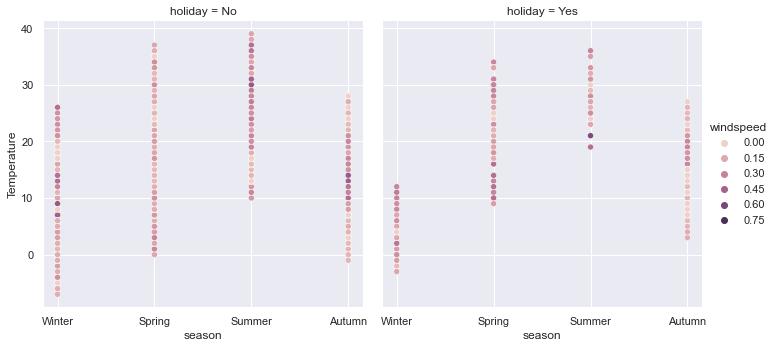

In [315]:
sns.set_theme()

sns.relplot(data=bike_hour,x="season", y="Temperature", col="holiday",hue="windspeed")

<AxesSubplot:xlabel='season', ylabel='weather_label'>

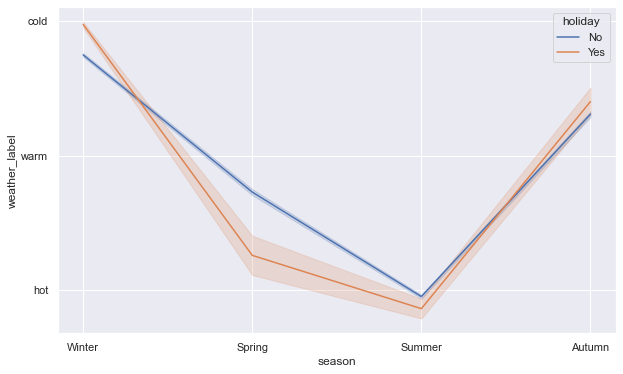

In [319]:
sns.lineplot(data=bike_hour,x="season", y="weather_label", hue="holiday")

<AxesSubplot:xlabel='weather_label', ylabel='casual'>

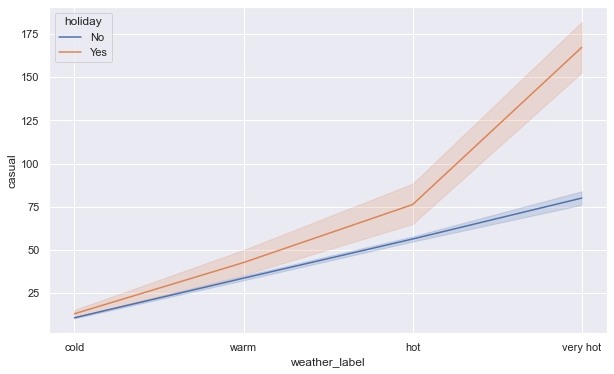

In [320]:
sns.lineplot(data=bike_hour,x="weather_label", y="casual", hue="holiday")

<AxesSubplot:xlabel='Temperature', ylabel='casual'>

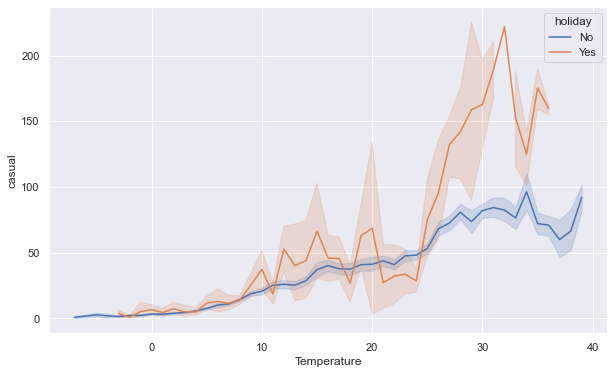

In [321]:
sns.lineplot(data=bike_hour,x="Temperature", y="casual", hue="holiday")

<AxesSubplot:xlabel='Temperature', ylabel='registered'>

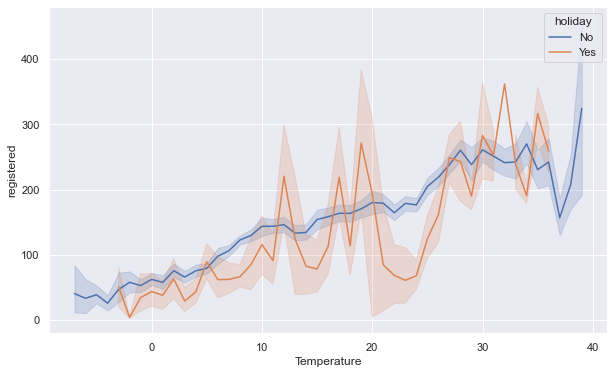

In [322]:
sns.lineplot(data=bike_hour,x="Temperature", y="registered", hue="holiday")

<AxesSubplot:xlabel='weekday', ylabel='registered'>

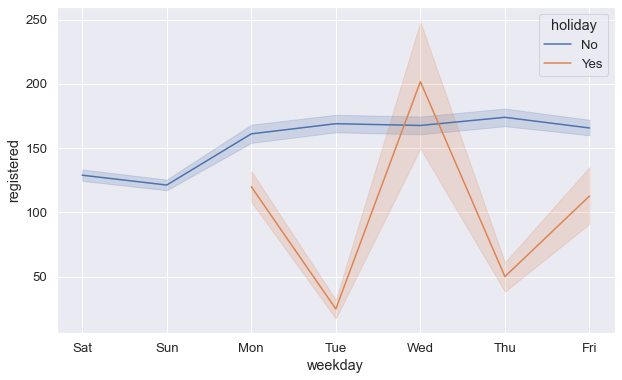

In [ ]:
#user behaviour. users vs. day or time or season...

sns.lineplot(data=bike_hour,x="weekday", y="registered", hue="holiday")

In [ ]:
bike_hour.dtypes

instant                  int64
dteday                  object
season                   int64
yr                       int64
mnth                     int64
hr                       int64
holiday                  int64
weekday                  int64
workingday               int64
weathersit               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
casual                   int64
registered               int64
cnt                      int64
casual user amount    category
dtype: object

<AxesSubplot:xlabel='hr', ylabel='temp'>

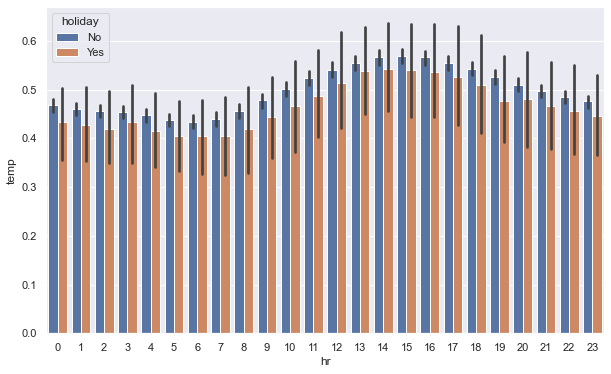

In [332]:
sns.barplot(data=bike_hour,x="hr", y="temp", hue="holiday")

<AxesSubplot:xlabel='hr', ylabel='casual'>

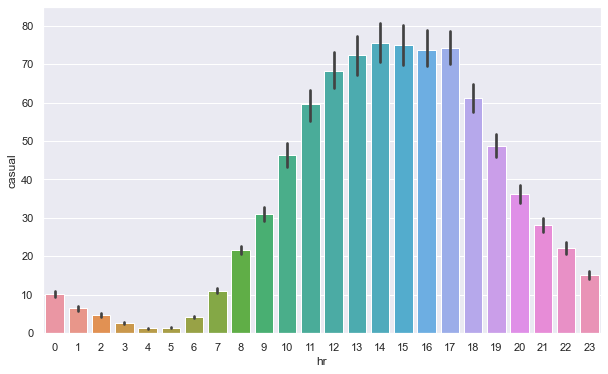

In [333]:

sns.barplot(data=bike_hour,x="hr", y="casual")

<AxesSubplot:xlabel='hr', ylabel='Temperature'>

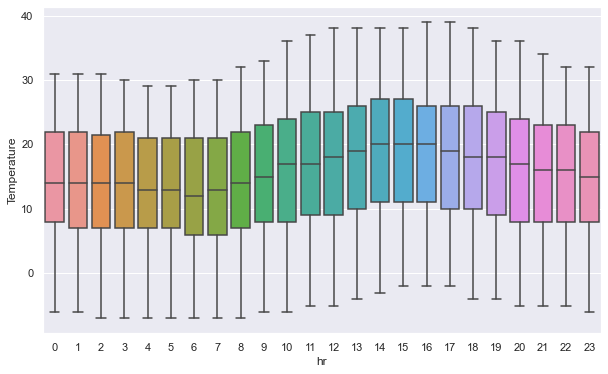

In [334]:
sns.boxplot(data=bike_hour,x="hr", y="Temperature")

<AxesSubplot:xlabel='weekday', ylabel='casual'>

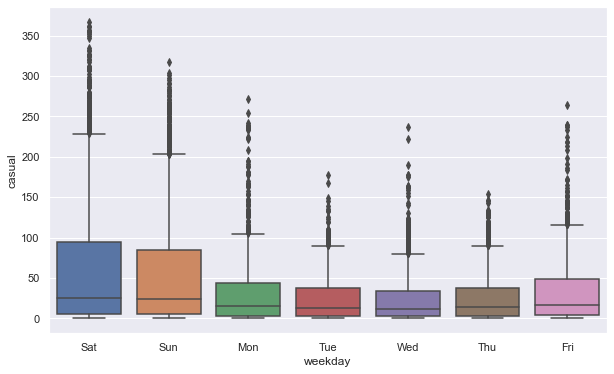

In [335]:
sns.boxplot(data=bike_hour,x="weekday", y="casual")

In [ ]:
#Time series

In [ ]:
time_df = bike_hour.groupby("Temperature") ["casual"].sum()
print (time_df.head())

print(type(time_df))

Temperature
-7    16
-6    28
-5    44
-4    33
-3    85
Name: casual, dtype: int64
<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

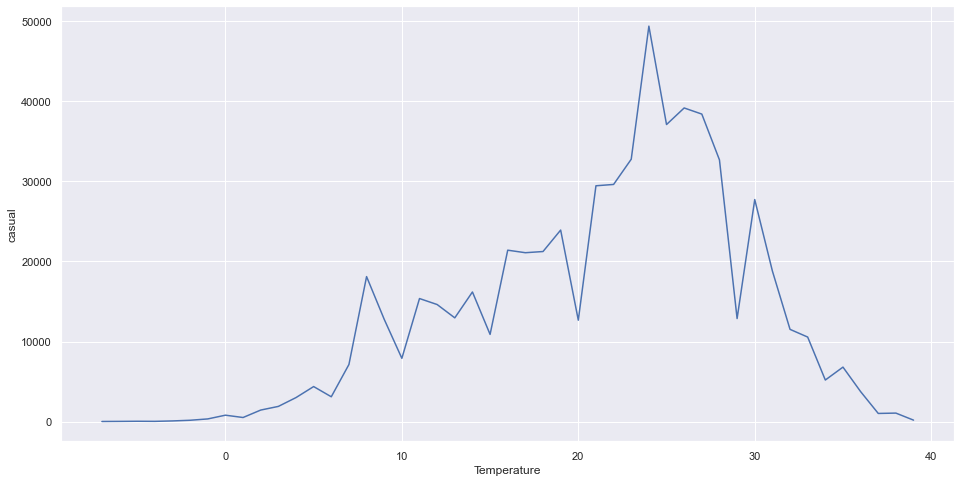

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(data= time_df)
plt.show

In [ ]:
#plt.figure(figsize=(16, 8))

#sns.barplot(data= time_df)
#plt.show

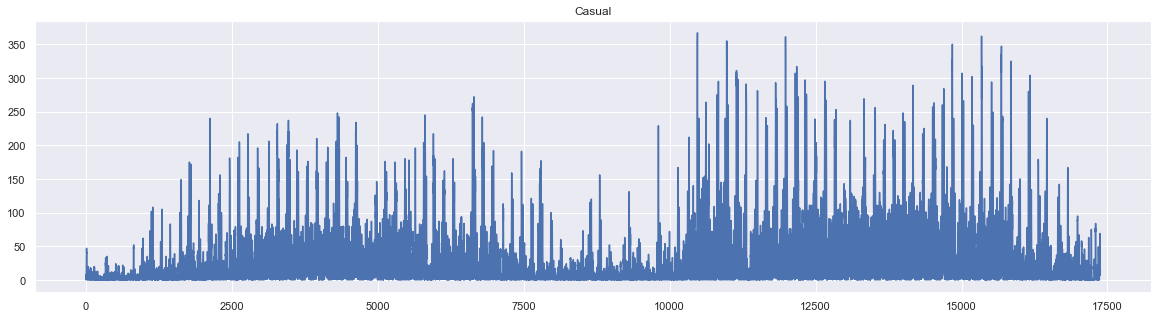

In [ ]:
bike_hour.casual.plot(figsize=(20,5),title = "Casual")
plt.show()

#the x axis is made up by the periods the values come from

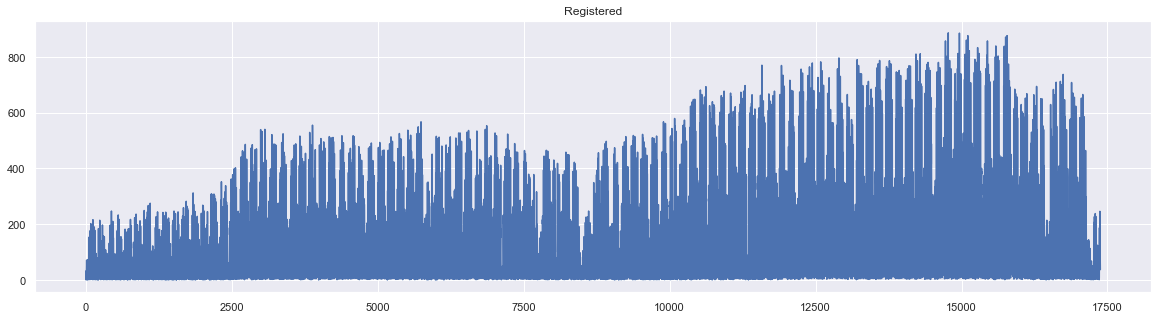

In [ ]:
bike_hour.registered.plot(figsize=(20,5),title = "Registered")
plt.show()

#the x axis is made up by the periods the values come from

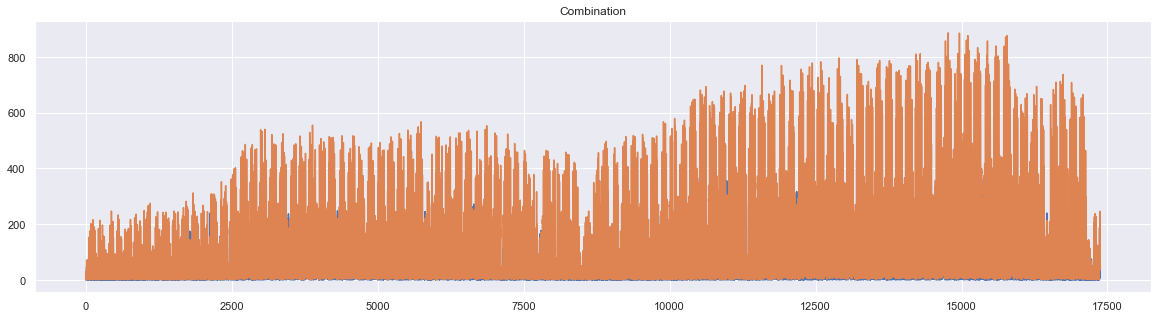

In [ ]:
bike_hour.casual.plot(figsize=(20,5),title = "Casual")
bike_hour.registered.plot(figsize=(20,5),title = "Registered")
plt.title("Combination")
plt.show()

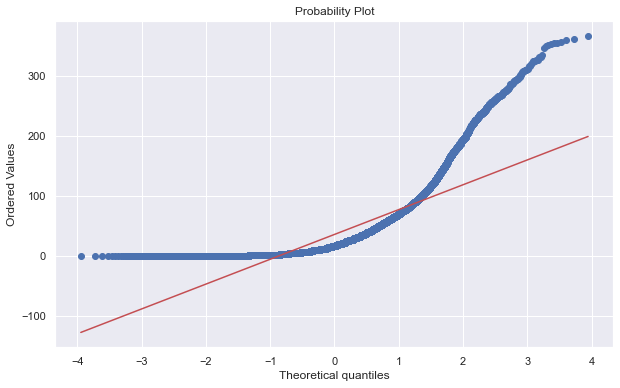

In [ ]:
scipy.stats.probplot(bike_hour.casual, plot = pylab)
pylab.show()

#takes all the values a variable can take and arranges them in accending order. Red : what the data points should follow, if they are Normally Disctributed. 

In [ ]:
bike_hour.dteday.describe()

/var/folders/6n/sf43sj591qd37_1r77rmw6v00000gn/T/ipykernel_985/3555000497.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour.dteday.describe()


count                   17379
unique                    731
top       2011-01-01 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

In [ ]:
sts.adfuller(bike_hour.hr)

(-18.530997304476426,
 2.1031057611527045e-30,
 43,
 17335,
 {'1%': -3.430727286910545,
  '5%': -2.861706746142428,
  '10%': -2.566858754660635},
 65407.57621769637)

In [ ]:
#get a mean of the usage. y axis vs. hr in x axis

In [ ]:
#sns.kdeplot(bike_hour.Temperature, bw_method=50)

In [ ]:
a = np.random.gamma(9, size=200)

/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

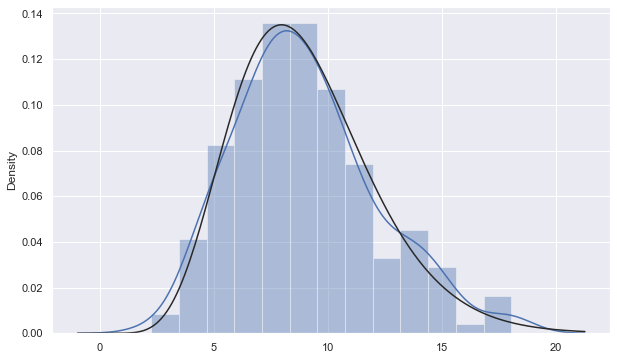

In [ ]:
sns.distplot(a,fit=stats.gamma)

In [ ]:
b =np.random.beta(7,7, size=200)

/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<AxesSubplot:ylabel='Density'>

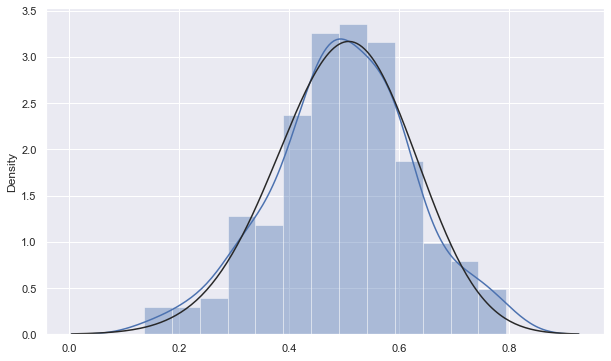

In [ ]:
sns.distplot(b, fit=stats.beta)

In [ ]:
#sns.relplot(data=bike_hour, x="Temperature", y= "casual", hue="weekday", col="holiday", row="hr")

In [ ]:
#sns.relplot(data=bike_hour, x="hr", y="Temperature", col="weekday",hue="casual", style="windspeed")

In [ ]:
#sns.relplot(data=bike_hour, kind="line")
#ditn give anything...

In [ ]:
#Start with station data.

In [ ]:
bike_station = pd.read_csv('stations.csv')

In [ ]:
bike_station.shape

member_station = bike_station["Member type"]

member_station

bike_station.dtypes


Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [336]:
winter_df = bike_hour.groupby("season") ["casual"].sum()
print (winter_df.head())

print(type(winter_df))

season
Autumn    129782
Spring    203522
Summer    226091
Winter     60622
Name: casual, dtype: int64
<class 'pandas.core.series.Series'>


In [337]:
winter_usage = bike_hour[bike_hour["season"] == "Winter"]
winter_usage.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount,weather_label
17374,17375,2012-12-31,Winter,2012,12,19,No,Mon,1,2,...,0.2576,0.60,0.1642,11,108,119,5,2,some,cold
17375,17376,2012-12-31,Winter,2012,12,20,No,Mon,1,2,...,0.2576,0.60,0.1642,8,81,89,5,2,few,cold
17376,17377,2012-12-31,Winter,2012,12,21,No,Mon,1,1,...,0.2576,0.60,0.1642,7,83,90,5,2,few,cold
17377,17378,2012-12-31,Winter,2012,12,22,No,Mon,1,1,...,0.2727,0.56,0.1343,13,48,61,5,2,some,cold
17378,17379,2012-12-31,Winter,2012,12,23,No,Mon,1,1,...,0.2727,0.65,0.1343,12,37,49,5,2,some,cold


In [338]:
winter_usage2 = bike_hour.query("yr == '2011'")
winter_usage3 = bike_hour.query("season == 'Winter'")

winter_usage4 = pd.merge(winter_usage2, winter_usage3)
winter_usage4.head()

#sns.lineplot(data=winter_usage4, x="dteday", y="casual", hue="yr")

#display("winter_usage2", "winter_usage3") this didnt help at all. Changed hue to year but nothing. Very ugly graph...

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount,weather_label
0,1,2011-01-01,Winter,2011,1,0,No,Sat,0,1,...,0.2879,0.81,0.0,3,13,16,4,4,few,cold
1,2,2011-01-01,Winter,2011,1,1,No,Sat,0,1,...,0.2727,0.80,0.0,8,32,40,3,2,few,cold
2,3,2011-01-01,Winter,2011,1,2,No,Sat,0,1,...,0.2727,0.80,0.0,5,27,32,3,2,few,cold
3,4,2011-01-01,Winter,2011,1,3,No,Sat,0,1,...,0.2879,0.75,0.0,3,10,13,4,4,few,cold
4,5,2011-01-01,Winter,2011,1,4,No,Sat,0,1,...,0.2879,0.75,0.0,0,1,1,4,4,few,cold


In [ ]:
#sns.displot(data=winter_usage4, x="dteday")

#very ugly graph

In [ ]:
#sns.histplot(data=winter_usage4, x="dteday")

#very ugly graph

<AxesSubplot:xlabel='dteday', ylabel='Density'>

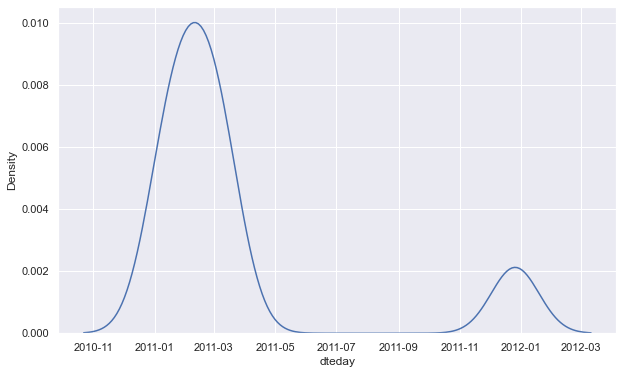

In [ ]:
sns.kdeplot(data=winter_usage4, x="dteday")

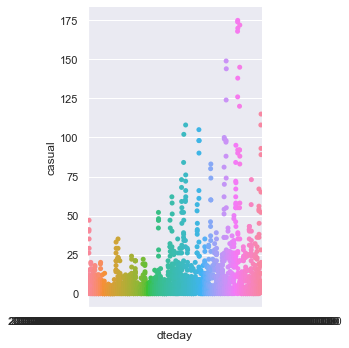

In [ ]:
sns.catplot(data=winter_usage4, x="dteday", y="casual")

In [ ]:
#sns.catplot(data=winter_usage4, x="dteday", y="casual", col="mnth",kind="bar", height=4, aspect=.6,)

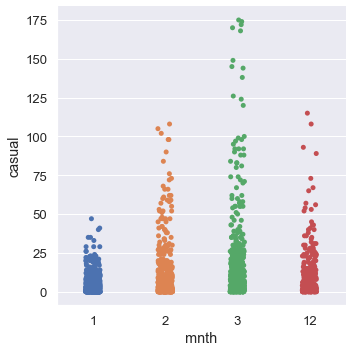

In [ ]:
sns.catplot(data=winter_usage4, x="mnth", y="casual")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

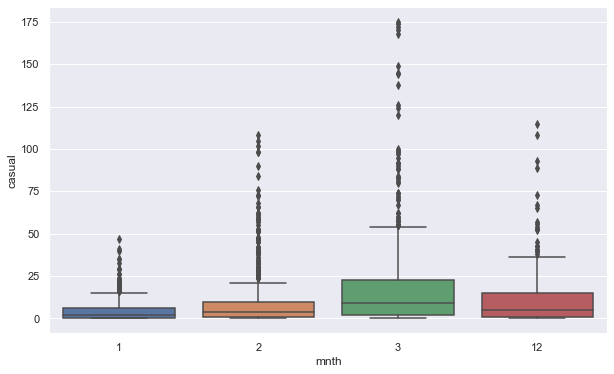

In [ ]:
sns.boxplot(data=winter_usage4, x="mnth", y="casual")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

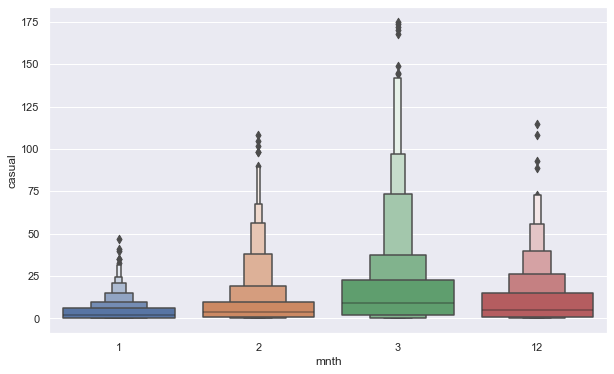

In [ ]:
sns.boxenplot(data=winter_usage4, x="mnth", y="casual")

In [326]:
#sns.pointplot(data=winter_usage4, x="mnth", y="casual")

#incorrect graph, shows December straight after March...

<AxesSubplot:xlabel='dteday', ylabel='casual'>

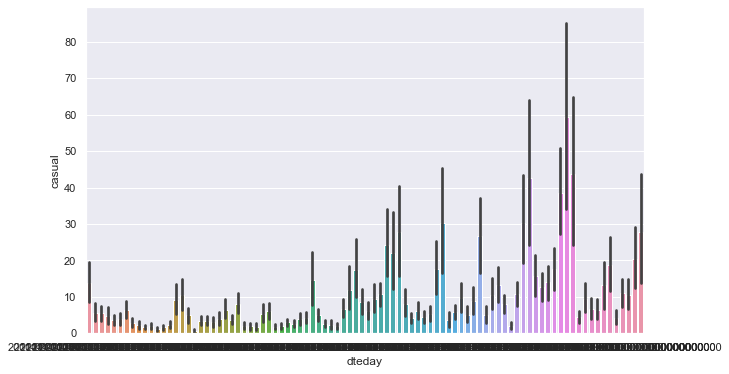

In [ ]:
sns.barplot(data=winter_usage4, x="dteday", y="casual")

<AxesSubplot:xlabel='casual user amount', ylabel='count'>

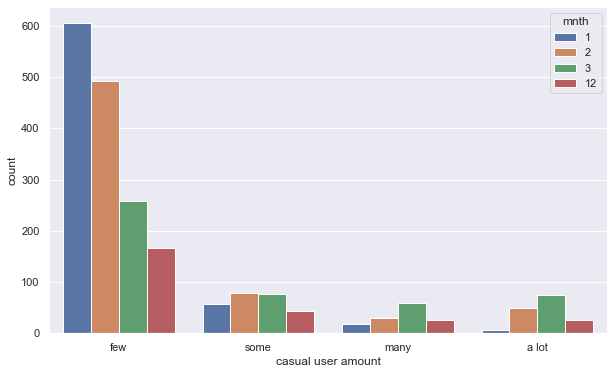

In [ ]:
sns.countplot(data=winter_usage4, x="casual user amount", hue="mnth")

<AxesSubplot:xlabel='mnth', ylabel='count'>

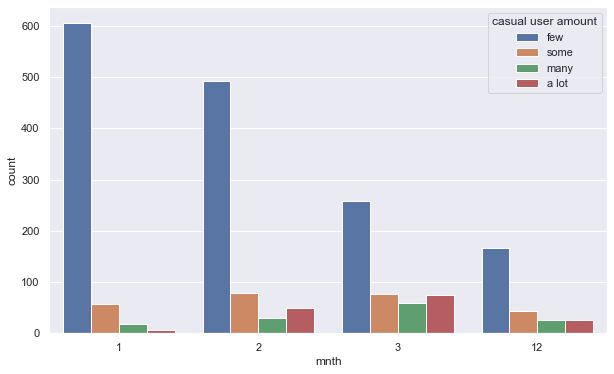

In [ ]:
sns.countplot(data=winter_usage4, x="mnth", hue="casual user amount")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

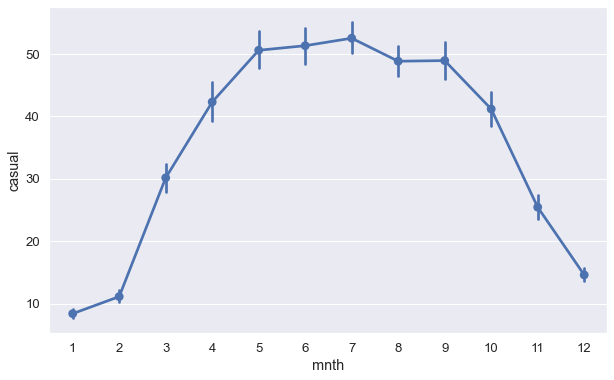

In [ ]:
sns.pointplot(data=bike_hour, x="mnth", y="casual")

In [ ]:
#sns.jointplot(data=winter_usage4, x="dteday", y="casual",marker="+", s=100, marginal_kws=dict(bins=25, fill=False))

In [ ]:
#g = sns.JointGrid(data=winter_usage4, x="dteday", y="casual", hue="mnth")
#g.plot(sns.scatterplot, sns.histplot)

In [ ]:
bike_station.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


<AxesSubplot:xlabel='Member type', ylabel='count'>

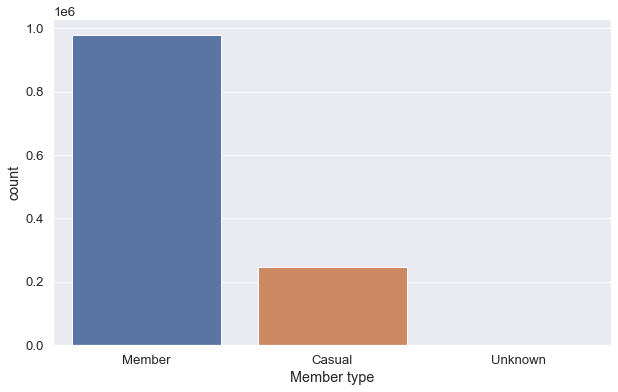

In [ ]:
sns.countplot(data=bike_station, x="Member type")

#remove Unknown from the df

In [ ]:
member_df = bike_station.groupby("Member type").sum()
print (member_df.head())

print(type(member_df))

              Duration  Start station number  End station number
Member type                                                     
Casual       687530197            7722576813          7722705557
Member       759503541           30659381045         30660837018
Unknown           3434                124648              124678
<class 'pandas.core.frame.DataFrame'>


In [343]:
november_usage = bike_hour[bike_hour["mnth"] == 11]
november_usage.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount,weather_label
16632,16633,2012-11-30,Autumn,2012,11,19,No,Fri,1,1,...,0.3485,0.66,0.0000,18,359,377,8,8,some,cold
16633,16634,2012-11-30,Autumn,2012,11,20,No,Fri,1,1,...,0.3485,0.66,0.0000,12,233,245,8,8,some,cold
16634,16635,2012-11-30,Autumn,2012,11,21,No,Fri,1,1,...,0.3182,0.75,0.0896,14,169,183,7,6,some,cold
16635,16636,2012-11-30,Autumn,2012,11,22,No,Fri,1,1,...,0.3333,0.75,0.0000,18,145,163,7,6,some,cold
16636,16637,2012-11-30,Autumn,2012,11,23,No,Fri,1,2,...,0.3182,0.75,0.0896,11,99,110,7,6,some,cold


In [345]:
november_usage1 = bike_hour.query("yr == '2011' & mnth == 11 ")
print (november_usage1)

      instant     dteday  season    yr  mnth  hr holiday weekday  workingday  \
7185     7186 2011-11-01  Autumn  2011    11   0      No     Tue           1   
7186     7187 2011-11-01  Autumn  2011    11   1      No     Tue           1   
7187     7188 2011-11-01  Autumn  2011    11   2      No     Tue           1   
7188     7189 2011-11-01  Autumn  2011    11   3      No     Tue           1   
7189     7190 2011-11-01  Autumn  2011    11   4      No     Tue           1   
...       ...        ...     ...   ...   ...  ..     ...     ...         ...   
7899     7900 2011-11-30  Autumn  2011    11  19      No     Wed           1   
7900     7901 2011-11-30  Autumn  2011    11  20      No     Wed           1   
7901     7902 2011-11-30  Autumn  2011    11  21      No     Wed           1   
7902     7903 2011-11-30  Autumn  2011    11  22      No     Wed           1   
7903     7904 2011-11-30  Autumn  2011    11  23      No     Wed           1   

      weathersit  ...   atemp   hum  wi

<AxesSubplot:xlabel='casual', ylabel='count'>

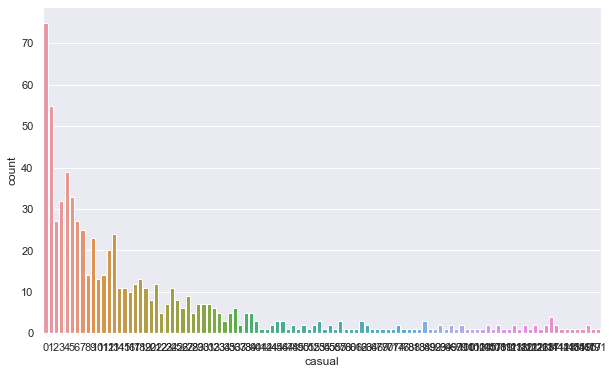

In [346]:
sns.countplot(data=november_usage1, x="casual")


In [347]:
december_usage1 = bike_hour.query("yr == '2011' & mnth == 12 ")
print (december_usage1)

      instant     dteday  season    yr  mnth  hr holiday weekday  workingday  \
7904     7905 2011-12-01  Autumn  2011    12   0      No     Thu           1   
7905     7906 2011-12-01  Autumn  2011    12   1      No     Thu           1   
7906     7907 2011-12-01  Autumn  2011    12   2      No     Thu           1   
7907     7908 2011-12-01  Autumn  2011    12   3      No     Thu           1   
7908     7909 2011-12-01  Autumn  2011    12   4      No     Thu           1   
...       ...        ...     ...   ...   ...  ..     ...     ...         ...   
8640     8641 2011-12-31  Winter  2011    12  19      No     Sat           0   
8641     8642 2011-12-31  Winter  2011    12  20      No     Sat           0   
8642     8643 2011-12-31  Winter  2011    12  21      No     Sat           0   
8643     8644 2011-12-31  Winter  2011    12  22      No     Sat           0   
8644     8645 2011-12-31  Winter  2011    12  23      No     Sat           0   

      weathersit  ...   atemp   hum  wi

<AxesSubplot:xlabel='dteday', ylabel='casual'>

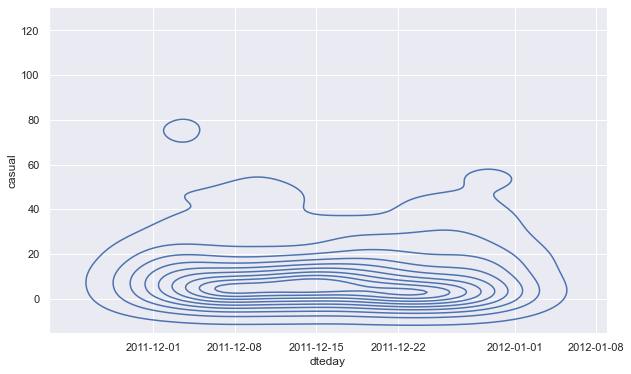

In [348]:
sns.kdeplot(data=december_usage1, x="dteday", y="casual")

<AxesSubplot:xlabel='dteday', ylabel='casual'>

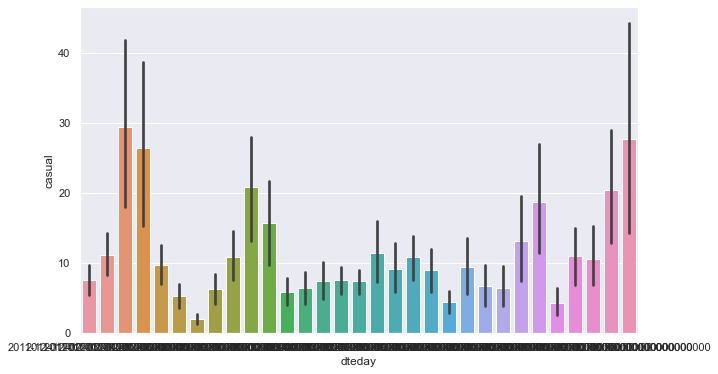

In [349]:
sns.barplot(data=december_usage1, x="dteday", y="casual")

<AxesSubplot:xlabel='dteday', ylabel='casual'>

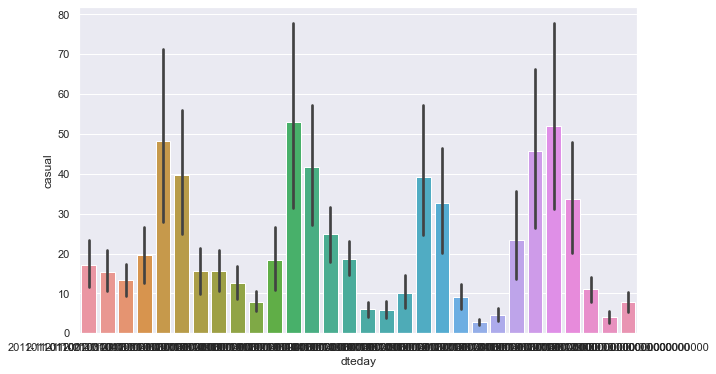

In [350]:
sns.barplot(data=november_usage1, x="dteday", y="casual")

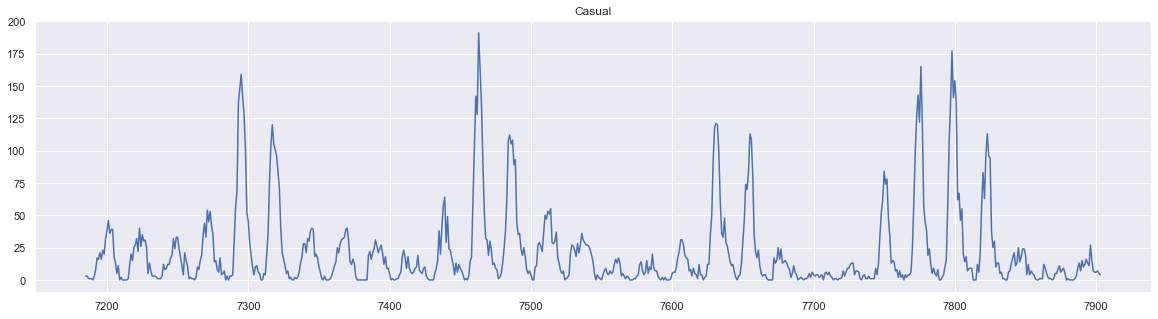

In [351]:
november_usage1.casual.plot(figsize=(20,5),title = "Casual", x="dteday")
plt.show()

In [352]:
november_usage1.loc[november_usage1['dteday'] == "2011-11-01", 'date'] = '01'
november_usage1.loc[november_usage1['dteday'] == "2011-11-02", 'date'] = '02'
november_usage1.loc[november_usage1['dteday'] == "2011-11-03", 'date'] = '03'
november_usage1.loc[november_usage1['dteday'] == "2011-11-04", 'date'] = '04'
november_usage1.loc[november_usage1['dteday'] == "2011-11-05", 'date'] = '05'
november_usage1.loc[november_usage1['dteday'] == "2011-11-06", 'date'] = '06'
november_usage1.loc[november_usage1['dteday'] == "2011-11-07", 'date'] = '07'
november_usage1.loc[november_usage1['dteday'] == "2011-11-08", 'date'] = '08'
november_usage1.loc[november_usage1['dteday'] == "2011-11-09", 'date'] = '09'
november_usage1.loc[november_usage1['dteday'] == "2011-11-10", 'date'] = '10'
november_usage1.loc[november_usage1['dteday'] == "2011-11-11", 'date'] = '11'
november_usage1.loc[november_usage1['dteday'] == "2011-11-12", 'date'] = '12'
november_usage1.loc[november_usage1['dteday'] == "2011-11-13", 'date'] = '13'
november_usage1.loc[november_usage1['dteday'] == "2011-11-14", 'date'] = '14'
november_usage1.loc[november_usage1['dteday'] == "2011-11-15", 'date'] = '15'
november_usage1.loc[november_usage1['dteday'] == "2011-11-16", 'date'] = '16'
november_usage1.loc[november_usage1['dteday'] == "2011-11-17", 'date'] = '17'
november_usage1.loc[november_usage1['dteday'] == "2011-11-18", 'date'] = '18'
november_usage1.loc[november_usage1['dteday'] == "2011-11-19", 'date'] = '19'
november_usage1.loc[november_usage1['dteday'] == "2011-11-20", 'date'] = '20'
november_usage1.loc[november_usage1['dteday'] == "2011-11-21", 'date'] = '21'
november_usage1.loc[november_usage1['dteday'] == "2011-11-22", 'date'] = '22'
november_usage1.loc[november_usage1['dteday'] == "2011-11-23", 'date'] = '23'
november_usage1.loc[november_usage1['dteday'] == "2011-11-24", 'date'] = '24'
november_usage1.loc[november_usage1['dteday'] == "2011-11-25", 'date'] = '25'
november_usage1.loc[november_usage1['dteday'] == "2011-11-26", 'date'] = '26'
november_usage1.loc[november_usage1['dteday'] == "2011-11-27", 'date'] = '27'
november_usage1.loc[november_usage1['dteday'] == "2011-11-28", 'date'] = '28'
november_usage1.loc[november_usage1['dteday'] == "2011-11-29", 'date'] = '29'
november_usage1.loc[november_usage1['dteday'] == "2011-11-30", 'date'] = '30'



/var/folders/6n/sf43sj591qd37_1r77rmw6v00000gn/T/ipykernel_985/3183086511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november_usage1.loc[november_usage1['dteday'] == "2011-11-01", 'date'] = '01'


In [353]:
november_usage1['dteday'].dt.day_name()

7185      Tuesday
7186      Tuesday
7187      Tuesday
7188      Tuesday
7189      Tuesday
          ...    
7899    Wednesday
7900    Wednesday
7901    Wednesday
7902    Wednesday
7903    Wednesday
Name: dteday, Length: 719, dtype: object

In [354]:
november_usage1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 7185 to 7903
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             719 non-null    int64         
 1   dteday              719 non-null    datetime64[ns]
 2   season              719 non-null    object        
 3   yr                  719 non-null    object        
 4   mnth                719 non-null    int64         
 5   hr                  719 non-null    int64         
 6   holiday             719 non-null    object        
 7   weekday             719 non-null    object        
 8   workingday          719 non-null    int64         
 9   weathersit          719 non-null    int64         
 10  temp                719 non-null    float64       
 11  atemp               719 non-null    float64       
 12  hum                 719 non-null    float64       
 13  windspeed           719 non-null    float64   

In [355]:
december_usage1.loc[december_usage1['dteday'] == "2011-12-01", 'date'] = '01'
december_usage1.loc[december_usage1['dteday'] == "2011-12-02", 'date'] = '02'
december_usage1.loc[december_usage1['dteday'] == "2011-12-03", 'date'] = '03'
december_usage1.loc[december_usage1['dteday'] == "2011-12-04", 'date'] = '04'
december_usage1.loc[december_usage1['dteday'] == "2011-12-05", 'date'] = '05'
december_usage1.loc[december_usage1['dteday'] == "2011-12-06", 'date'] = '06'
december_usage1.loc[december_usage1['dteday'] == "2011-12-07", 'date'] = '07'
december_usage1.loc[december_usage1['dteday'] == "2011-12-08", 'date'] = '08'
december_usage1.loc[december_usage1['dteday'] == "2011-12-09", 'date'] = '09'
december_usage1.loc[december_usage1['dteday'] == "2011-12-10", 'date'] = '10'
december_usage1.loc[december_usage1['dteday'] == "2011-12-11", 'date'] = '11'
december_usage1.loc[december_usage1['dteday'] == "2011-12-12", 'date'] = '12'
december_usage1.loc[december_usage1['dteday'] == "2011-12-13", 'date'] = '13'
december_usage1.loc[december_usage1['dteday'] == "2011-12-14", 'date'] = '14'
december_usage1.loc[december_usage1['dteday'] == "2011-12-15", 'date'] = '15'
december_usage1.loc[december_usage1['dteday'] == "2011-12-16", 'date'] = '16'
december_usage1.loc[december_usage1['dteday'] == "2011-12-17", 'date'] = '17'
december_usage1.loc[december_usage1['dteday'] == "2011-12-18", 'date'] = '18'
december_usage1.loc[december_usage1['dteday'] == "2011-12-19", 'date'] = '19'
december_usage1.loc[december_usage1['dteday'] == "2011-12-20", 'date'] = '20'
december_usage1.loc[december_usage1['dteday'] == "2011-12-21", 'date'] = '21'
december_usage1.loc[december_usage1['dteday'] == "2011-12-22", 'date'] = '22'
december_usage1.loc[december_usage1['dteday'] == "2011-12-23", 'date'] = '23'
december_usage1.loc[december_usage1['dteday'] == "2011-12-24", 'date'] = '24'
december_usage1.loc[december_usage1['dteday'] == "2011-12-25", 'date'] = '25'
december_usage1.loc[december_usage1['dteday'] == "2011-12-26", 'date'] = '26'
december_usage1.loc[december_usage1['dteday'] == "2011-12-27", 'date'] = '27'
december_usage1.loc[december_usage1['dteday'] == "2011-12-28", 'date'] = '28'
december_usage1.loc[december_usage1['dteday'] == "2011-12-29", 'date'] = '29'
december_usage1.loc[december_usage1['dteday'] == "2011-12-30", 'date'] = '30'

/var/folders/6n/sf43sj591qd37_1r77rmw6v00000gn/T/ipykernel_985/4057174153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_usage1.loc[december_usage1['dteday'] == "2011-12-01", 'date'] = '01'


In [356]:
december_usage1.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount,weather_label,date
7904,7905,2011-12-01,Autumn,2011,12,0,No,Thu,1,1,...,0.52,0.3284,1,19,20,6,2,few,cold,01
7905,7906,2011-12-01,Autumn,2011,12,1,No,Thu,1,1,...,0.60,0.2836,1,9,10,5,0,few,cold,01
7906,7907,2011-12-01,Autumn,2011,12,2,No,Thu,1,1,...,0.56,0.2985,1,8,9,5,0,few,cold,01
7907,7908,2011-12-01,Autumn,2011,12,3,No,Thu,1,1,...,0.56,0.2537,1,6,7,5,0,few,cold,01
7908,7909,2011-12-01,Autumn,2011,12,4,No,Thu,1,1,...,0.56,0.2836,0,1,1,5,0,few,cold,01


In [357]:
november_usage1.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,casual user amount,weather_label,date
7185,7186,2011-11-01,Autumn,2011,11,0,No,Tue,1,2,...,0.87,0.1642,3,18,21,9,8,few,cold,01
7186,7187,2011-11-01,Autumn,2011,11,1,No,Tue,1,1,...,0.81,0.1343,3,8,11,9,8,few,cold,01
7187,7188,2011-11-01,Autumn,2011,11,2,No,Tue,1,2,...,0.81,0.1642,1,3,4,9,8,few,cold,01
7188,7189,2011-11-01,Autumn,2011,11,3,No,Tue,1,2,...,0.81,0.1343,1,5,6,9,8,few,cold,01
7189,7190,2011-11-01,Autumn,2011,11,4,No,Tue,1,1,...,0.81,0.2239,1,7,8,8,6,few,cold,01


<AxesSubplot:xlabel='date', ylabel='casual'>

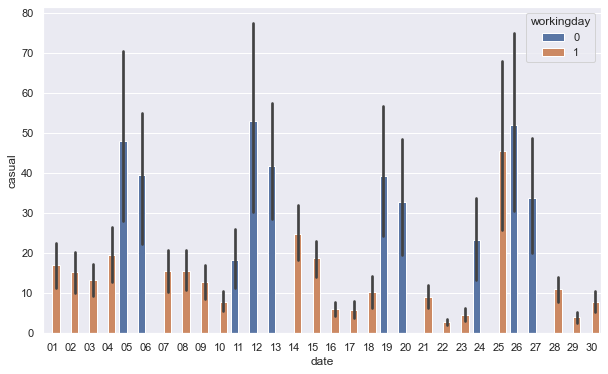

In [358]:
sns.barplot(data=november_usage1, x="date", y="casual", hue="workingday")

<AxesSubplot:xlabel='date', ylabel='casual'>

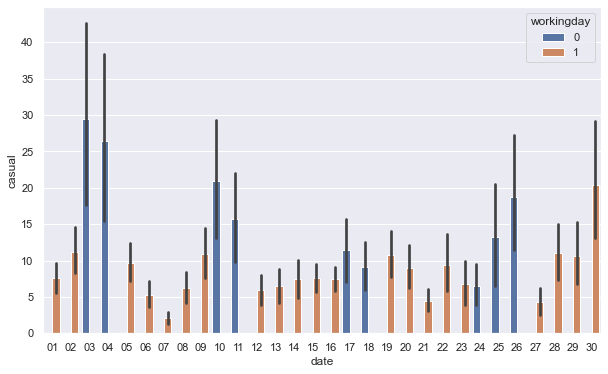

In [359]:
sns.barplot(data=december_usage1, x="date", y="casual", hue="workingday")

<AxesSubplot:xlabel='date', ylabel='Temperature'>

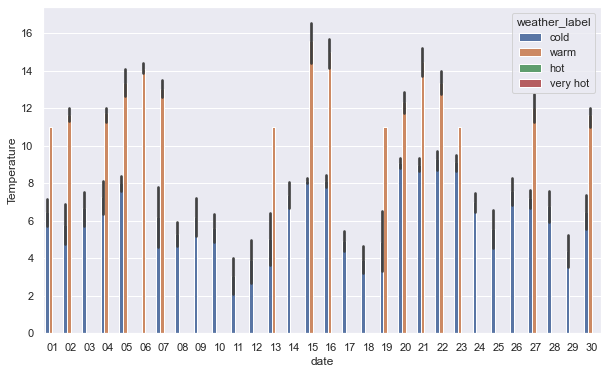

In [361]:
sns.barplot(data=december_usage1, x="date", y="Temperature", hue="weather_label")

<AxesSubplot:xlabel='date', ylabel='count'>

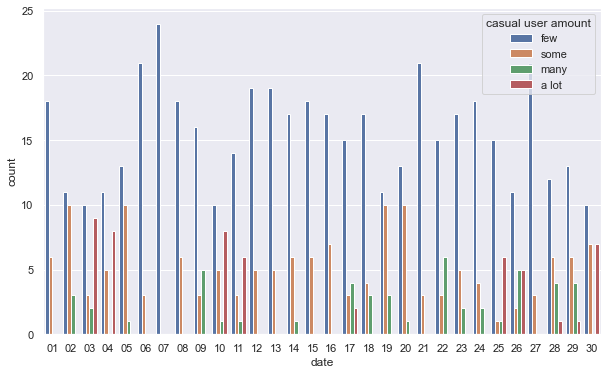

In [362]:
sns.countplot(data=december_usage1, x="date", hue="casual user amount")

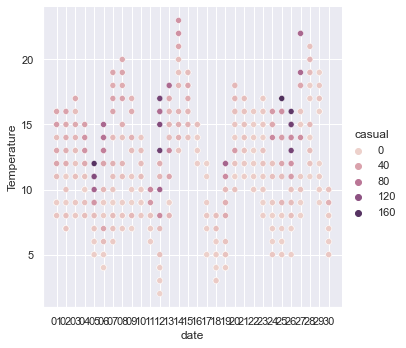

In [364]:
sns.set_theme()

sns.relplot(data=november_usage1, x="date", y="Temperature", hue="casual")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

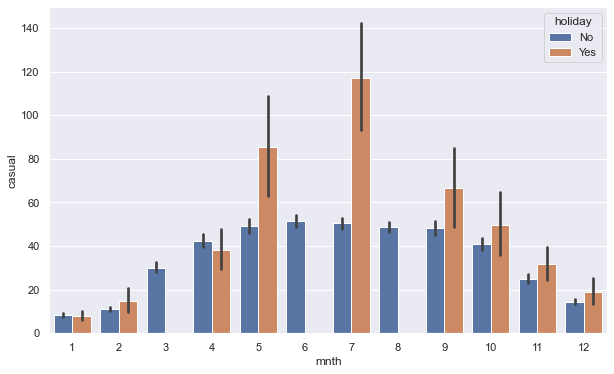

In [365]:
sns.barplot(data=bike_hour,x="mnth", y="casual", hue="holiday")

In [366]:
july_usage = bike_hour.query("yr == '2011' & mnth == 7 ")
#print (july_usage)

In [367]:
july_usage.loc[july_usage['dteday'] == "2011-07-01", 'date'] = '01'
july_usage.loc[july_usage['dteday'] == "2011-07-02", 'date'] = '02'
july_usage.loc[july_usage['dteday'] == "2011-07-03", 'date'] = '03'
july_usage.loc[july_usage['dteday'] == "2011-07-04", 'date'] = '04'
july_usage.loc[july_usage['dteday'] == "2011-07-05", 'date'] = '05'
july_usage.loc[july_usage['dteday'] == "2011-07-06", 'date'] = '06'
july_usage.loc[july_usage['dteday'] == "2011-07-07", 'date'] = '07'
july_usage.loc[july_usage['dteday'] == "2011-07-08", 'date'] = '08'
july_usage.loc[july_usage['dteday'] == "2011-07-09", 'date'] = '09'
july_usage.loc[july_usage['dteday'] == "2011-07-10", 'date'] = '10'
july_usage.loc[july_usage['dteday'] == "2011-07-11", 'date'] = '11'
july_usage.loc[july_usage['dteday'] == "2011-07-12", 'date'] = '12'
july_usage.loc[july_usage['dteday'] == "2011-07-13", 'date'] = '13'
july_usage.loc[july_usage['dteday'] == "2011-07-14", 'date'] = '14'
july_usage.loc[july_usage['dteday'] == "2011-07-15", 'date'] = '15'
july_usage.loc[july_usage['dteday'] == "2011-07-16", 'date'] = '16'
july_usage.loc[july_usage['dteday'] == "2011-07-17", 'date'] = '17'
july_usage.loc[july_usage['dteday'] == "2011-07-18", 'date'] = '18'
july_usage.loc[july_usage['dteday'] == "2011-07-19", 'date'] = '19'
july_usage.loc[july_usage['dteday'] == "2011-07-20", 'date'] = '20'
july_usage.loc[july_usage['dteday'] == "2011-07-21", 'date'] = '21'
july_usage.loc[july_usage['dteday'] == "2011-07-22", 'date'] = '22'
july_usage.loc[july_usage['dteday'] == "2011-07-23", 'date'] = '23'
july_usage.loc[july_usage['dteday'] == "2011-07-24", 'date'] = '24'
july_usage.loc[july_usage['dteday'] == "2011-07-25", 'date'] = '25'
july_usage.loc[july_usage['dteday'] == "2011-07-26", 'date'] = '26'
july_usage.loc[july_usage['dteday'] == "2011-07-27", 'date'] = '27'
july_usage.loc[july_usage['dteday'] == "2011-07-28", 'date'] = '28'
july_usage.loc[july_usage['dteday'] == "2011-07-29", 'date'] = '29'
july_usage.loc[july_usage['dteday'] == "2011-07-30", 'date'] = '30'
july_usage.loc[july_usage['dteday'] == "2011-07-31", 'date'] = '31'


/var/folders/6n/sf43sj591qd37_1r77rmw6v00000gn/T/ipykernel_985/361640994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_usage.loc[july_usage['dteday'] == "2011-07-01", 'date'] = '01'


<AxesSubplot:xlabel='date', ylabel='casual'>

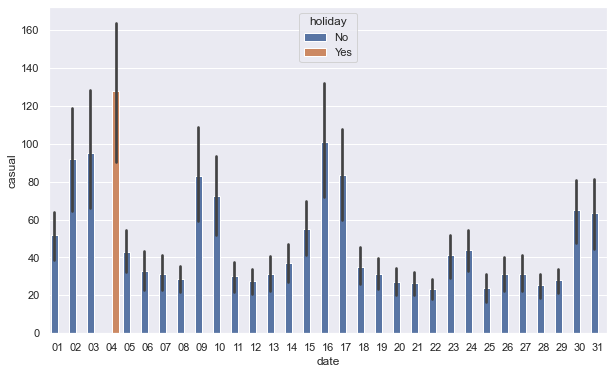

In [368]:
sns.barplot(data=july_usage,x="date", y="casual", hue="holiday")

In [369]:
bike_station.shape

(1226767, 9)

In [ ]:
#cnt vs temp. same range, numeric. use min max. coefficience? colinearity?
#univariate first, then linear regression. 
#we need to train! again. 
#do a heat map! for the eda...
#regression model for forcasting. presentation! to build KPI's. forecast bike demand.

In [ ]:
#postcrus or sqllite or sql ace.  

In [ ]:
#find the unique values in stations

bike_station["End station number"].unique()

#9 times 16 = 144

array([31620, 31101, 31104, 31503, 31106, 31618, 31201, 31202, 31111,
       31010, 31109, 31400, 31214, 31607, 31103, 31602, 31504, 31619,
       31229, 31402, 31208, 31213, 31105, 31207, 31221, 31616, 31112,
       31224, 31401, 31008, 31100, 31107, 31205, 31009, 31300, 31200,
       31006, 31237, 31110, 31604, 31611, 31203, 31609, 31108, 31220,
       31623, 31212, 31004, 31218, 31227, 31608, 31001, 31610, 31303,
       31204, 31217, 31305, 31216, 31223, 31219, 31606, 31238, 31603,
       31211, 31613, 31215, 31235, 31228, 31011, 31013, 31600, 31002,
       31003, 31225, 31102, 31605, 31236, 31226, 31222, 31624, 31505,
       31206, 31622, 31500, 31005, 31617, 31304, 31007, 31700, 31502,
       31302, 31601, 31704, 31805, 31501, 31209, 31012, 31266, 31301,
       31801, 31000, 31703, 31802, 31705, 31702, 31804, 31052, 31262,
       31014, 31018, 31016, 31015, 31231, 31233, 31232, 31230, 31621,
       31701, 31625, 31706, 31261, 31019, 31017, 31239, 31113, 31241,
       31021, 31022,

<AxesSubplot:xlabel='End station number', ylabel='Start station number'>

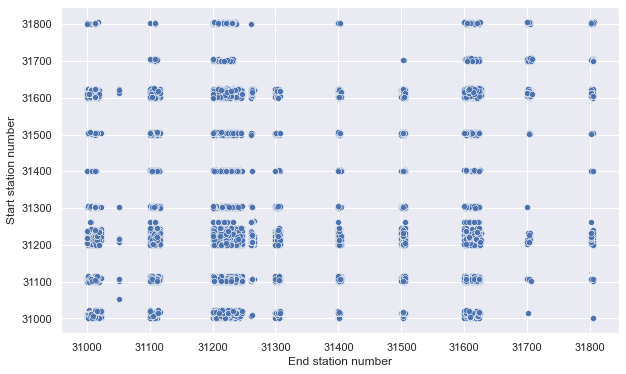

In [370]:
sns.scatterplot(data=bike_station, x="End station number", y="Start station number")

In [371]:
SSN = bike_station["Start station number"]
ESN = bike_station["End station number"]


In [372]:
stations_info_start = bike_station.groupby("Start station number").sum()
print (stations_info_start.head())

print(type(stations_info_start))

                      Duration  End station number
Start station number                              
31000                  1558493            36342927
31001                  4349054           108406325
31002                  4900263            89603336
31003                  5247731           106573820
31004                  1545708            49614745
<class 'pandas.core.frame.DataFrame'>


In [373]:
stations_info_end = bike_station.groupby("End station number").sum()
#print (stations_info2.head(50))

#print(type(stations_info2))

In [374]:
usage_2011 = bike_hour.query("yr == '2011'")
print (usage_2011)

      instant     dteday  season    yr  mnth  hr holiday weekday  workingday  \
0           1 2011-01-01  Winter  2011     1   0      No     Sat           0   
1           2 2011-01-01  Winter  2011     1   1      No     Sat           0   
2           3 2011-01-01  Winter  2011     1   2      No     Sat           0   
3           4 2011-01-01  Winter  2011     1   3      No     Sat           0   
4           5 2011-01-01  Winter  2011     1   4      No     Sat           0   
...       ...        ...     ...   ...   ...  ..     ...     ...         ...   
8640     8641 2011-12-31  Winter  2011    12  19      No     Sat           0   
8641     8642 2011-12-31  Winter  2011    12  20      No     Sat           0   
8642     8643 2011-12-31  Winter  2011    12  21      No     Sat           0   
8643     8644 2011-12-31  Winter  2011    12  22      No     Sat           0   
8644     8645 2011-12-31  Winter  2011    12  23      No     Sat           0   

      weathersit  ...   atemp   hum  wi

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

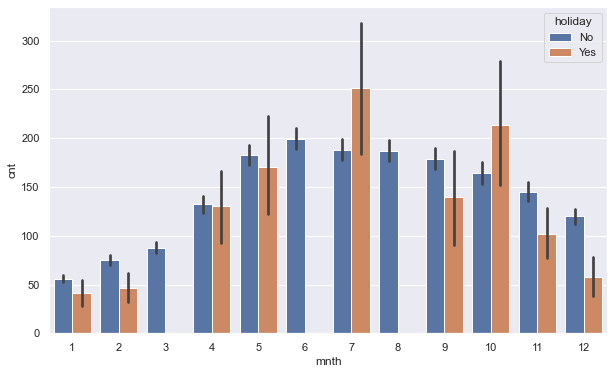

In [375]:
sns.barplot(data=usage_2011,x="mnth", y="cnt", hue="holiday")

<AxesSubplot:title={'center':'Casual'}>

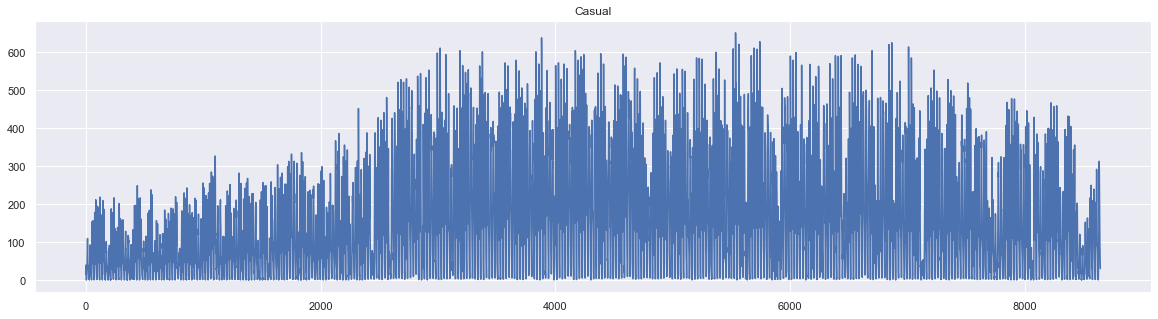

In [376]:
usage_2011.cnt.plot(figsize=(20,5),title = "Casual", x="mnth")
#plt.show()

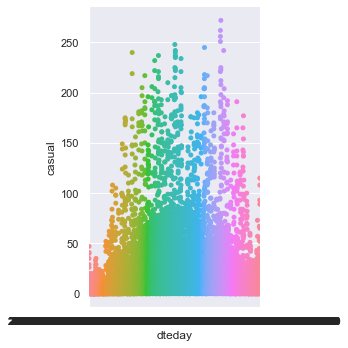

In [377]:
sns.catplot(data=usage_2011, x="dteday", y="casual")

In [ ]:
#univeriate, measure the targets against each feature. 

In [379]:
#sns.boxplot(data=bike_station, x="End station number", y="Start station number")
#too fiddly and unclear

In [ ]:
print(max(SSN))

#min of SSN = 31000
#max of SSN = 31806

31806


In [ ]:
print(min(ESN))
#max of ESN = 31806
#min of ESN = 31000

SSN.info()
#entries, 0 to 1226766

ESN.info()
#entries, 0 to 1226766

ESN.sum()



31000
<class 'pandas.core.series.Series'>
RangeIndex: 1226767 entries, 0 to 1226766
Series name: Start station number
Non-Null Count    Dtype
--------------    -----
1226767 non-null  int64
dtypes: int64(1)
memory usage: 9.4 MB
<class 'pandas.core.series.Series'>
RangeIndex: 1226767 entries, 0 to 1226766
Series name: End station number
Non-Null Count    Dtype
--------------    -----
1226767 non-null  int64
dtypes: int64(1)
memory usage: 9.4 MB


38383667253

In [ ]:
#So for now..
#Convert all features to numeric
#Use your univariate analyses to see if you need to remove outliers
#Do your x/y and test/train splits
#Normalise
#Run the LinearRegression model from sklearn
#Start working on interpreting the results

In [380]:
corr_matrix=bike_hour.corr()

<AxesSubplot:>

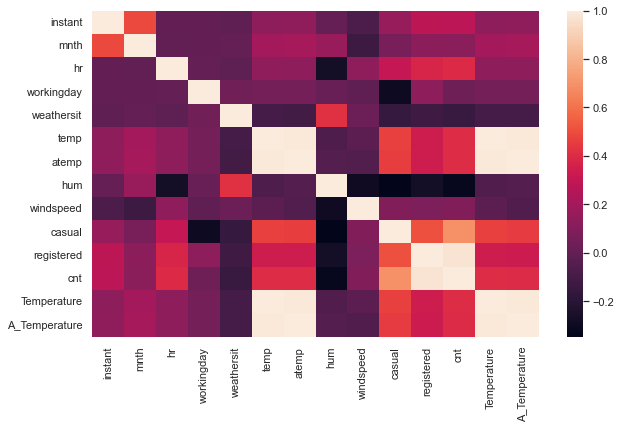

In [381]:
sns.heatmap(corr_matrix)

<AxesSubplot:>

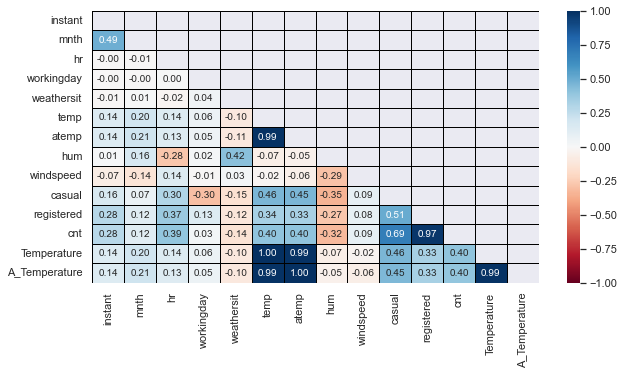

In [382]:
plt.figure(1, figsize=(10,5))
matrix = np.triu(corr_matrix)

sns.heatmap(corr_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"fontsize":10}, linewidths=1, linecolor="black",mask=matrix)


<AxesSubplot:>

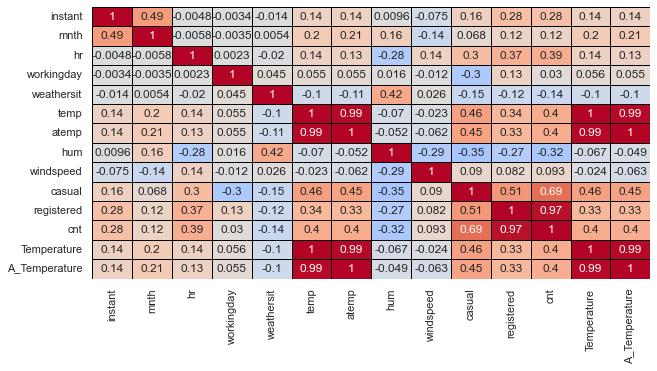

In [383]:
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, cbar=False, linewidths=0.5, linecolor='black')

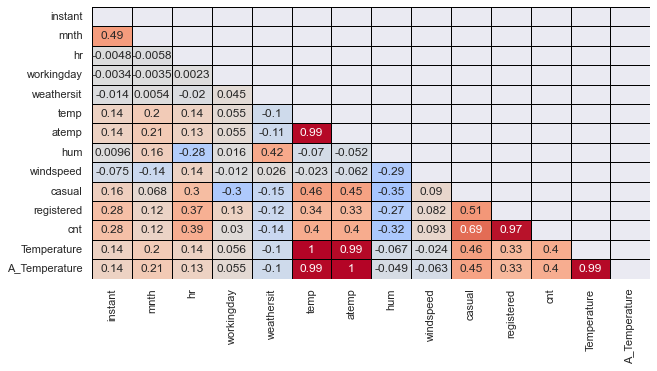

In [384]:
plt.figure(1, figsize=(10,5))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, cbar=False, linewidths=0.5, linecolor='black', mask=matrix)
matrix = np.triu(corr_matrix)
